# COVID-19 Growth By State (US)
> Growth of COVID-19 for the US by State.

- comments: true
- author: Avy Faingezicht
- categories: [growth, US, states]
- image: images/covid-growth-states.png
- permalink: /growth-us-states/

In [1]:
#hide
!pip install pandas matplotlib

In [2]:
#hide
%matplotlib inline
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

states_url = "https://covidtracking.com/api/states/daily"
us_url = "https://covidtracking.com/api/us/daily"
case_threshold = 100

In [3]:
#hide
r = requests.get(states_url)
states_df = pd.DataFrame(r.json())
states_df['date'] = pd.to_datetime(states_df.date, format="%Y%m%d")
states_df = states_df[['date', 'state', 'positive']].sort_values('date')
cols = {}
for state in states_df.state.unique():
    cases = states_df[(states_df.state == state) & (states_df.positive > 100)]
    cases = cases.reset_index().positive.reset_index(drop=True)
    if len(cases):
        cols[state] = cases
        
r = requests.get(us_url)
us_df = pd.DataFrame(r.json())
us_df['date'] = pd.to_datetime(us_df.date, format="%Y%m%d")
us_df = us_df[['date', 'positive']].sort_values('date')
cols['US'] = us_df.positive.reset_index(drop=True)

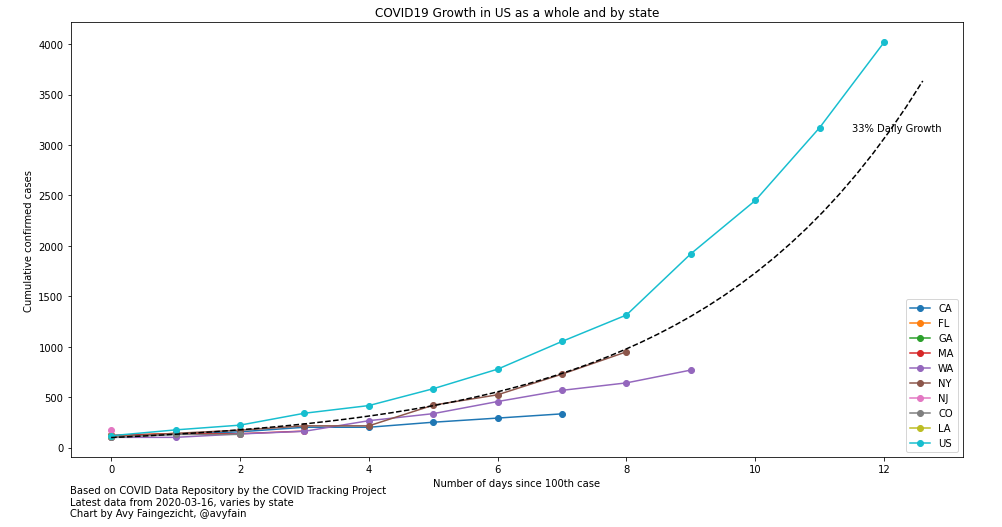

In [4]:
#collapse-hide
fig = plt.figure(figsize=(16, 8))
ax = plt.axes()

pd.concat(cols, axis=1).plot(ax=ax, marker='o')
plt.title('COVID19 Growth in US as a whole and by state')
plt.ylabel('Cumulative confirmed cases')
plt.xlabel(f'Number of days since {case_threshold}th case')
plt.annotate('Based on COVID Data Repository by the COVID Tracking Project\n'
             f'Latest data from {states_df.date.max().strftime("%Y-%m-%d")}, varies by state\n'
             'Chart by Avy Faingezicht, @avyfain', 
             (0.07, 0.02), xycoords='figure fraction', fontsize=10);
plt.legend(loc="lower right")
x = np.linspace(0, plt.xlim()[1])
plt.plot(x, 100 * (1.33) ** x, ls='--', color='k', label='33% daily growth')
plt.annotate('33% Daily Growth', 
             (0.85, 0.75), xycoords='figure fraction', fontsize=10);

formatter = ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_minor_formatter(formatter)

## Same Chart, Y-Axis On A Log Scale

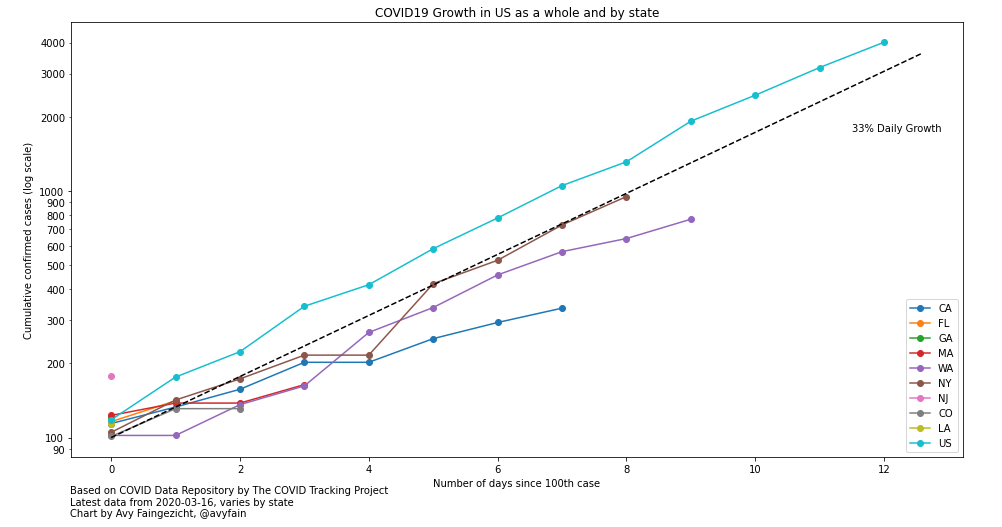

In [5]:
#collapse-hide
fig = plt.figure(figsize=(16, 8))
ax = plt.axes()

pd.concat(cols, axis=1).plot(ax=ax, marker='o', logy=True)
plt.title('COVID19 Growth in US as a whole and by state')
plt.ylabel('Cumulative confirmed cases (log scale)')
plt.xlabel(f'Number of days since {case_threshold}th case')
plt.annotate('Based on COVID Data Repository by The COVID Tracking Project\n'
             f'Latest data from {states_df.date.max().strftime("%Y-%m-%d")}, varies by state\n'
             'Chart by Avy Faingezicht, @avyfain', 
             (0.07, 0.02), xycoords='figure fraction', fontsize=10);
plt.legend(loc="lower right")

plt.plot(x, 100 * (1.33) ** x, ls='--', color='k', label='33% daily growth')
plt.annotate('33% Daily Growth', 
             (0.85, 0.75), xycoords='figure fraction', fontsize=10);

ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_minor_formatter(formatter)

In [6]:
#hide
fig.savefig('../images/covid-growth-states.png')

Updated hourly by [GitHub Actions](https://github.com/features/actions).

This visualization was made by [Avy Faingezicht](https://twitter.com/avyfain)[^1].

[^1]:  Data sourced from ["The COVID Tracking Project"](https://covidtracking.com/). Link to [original notebook](https://github.com/avyfain/covid19/blob/master/covid19.ipynb).